In [11]:
!pip install ctgan --q

In [9]:
import pandas as pd
import numpy as np
import torch
from ctgan import CTGAN

In [10]:
csv_file_path = 'C:/Users/pedro.ribeiro/Documents/irt.csv'

# Define the CSV file path and read data into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df = df.iloc[:, 1:]

# Convert the DataFrame to a PyTorch tensor
data = torch.tensor(df.to_numpy(dtype=np.float32))

# Now, 'data' contains your data as a PyTorch tensor
# Convert the tensor to a Pandas DataFrame
df = pd.DataFrame(data)

# Create new column names
new_columns = ['Departamento'] + [f'Q{i}' for i in range(1, 11)]

# Rename the columns
df.columns = new_columns
df

,Departamento,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,2.0,4.0,5.0,3.0,1.0,5.0,2.0,3.0,5.0,4.0,2.0
1,3.0,4.0,5.0,0.0,2.0,2.0,1.0,5.0,1.0,3.0,3.0
2,6.0,5.0,4.0,2.0,5.0,3.0,2.0,5.0,4.0,1.0,5.0
3,6.0,1.0,4.0,1.0,3.0,4.0,5.0,3.0,2.0,1.0,5.0
4,2.0,3.0,1.0,2.0,0.0,2.0,3.0,3.0,4.0,4.0,1.0
5,6.0,4.0,5.0,2.0,4.0,1.0,2.0,3.0,2.0,2.0,5.0
6,4.0,1.0,0.0,4.0,2.0,4.0,3.0,2.0,4.0,5.0,5.0
7,2.0,2.0,1.0,4.0,0.0,4.0,4.0,4.0,0.0,4.0,2.0
8,3.0,0.0,2.0,5.0,4.0,4.0,3.0,1.0,1.0,1.0,4.0
9,6.0,0.0,1.0,0.0,5.0,0.0,5.0,3.0,5.0,3.0,3.0


In [12]:
ctgan = CTGAN(epochs=1000)
ctgan.fit(df)

# Create synthetic data
synthetic_data = ctgan.sample(1000)

In [13]:
new_data = synthetic_data
new_data.columns=['Departamento','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
df.columns=['Departamento','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
new_data = new_data.round(0)
new_data = new_data.applymap(lambda x: 0 if x < 0 else x)
new_data = new_data.applymap(lambda x: 0 if x == 0 else x)
new_data

,Departamento,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1.0,4.0,0.0,4.0,1.0,3.0,1.0,3.0,3.0,4.0,4.0
1,1.0,2.0,2.0,6.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0
2,1.0,1.0,6.0,4.0,2.0,2.0,3.0,1.0,2.0,3.0,4.0
3,2.0,2.0,3.0,6.0,1.0,2.0,4.0,0.0,4.0,5.0,4.0
4,2.0,0.0,2.0,5.0,3.0,3.0,5.0,3.0,3.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,2.0,6.0,4.0,2.0,4.0,1.0,2.0,3.0,4.0,3.0
996,2.0,1.0,4.0,6.0,0.0,4.0,2.0,1.0,1.0,4.0,5.0
997,3.0,2.0,5.0,4.0,5.0,3.0,3.0,2.0,4.0,3.0,5.0
998,1.0,3.0,5.0,5.0,0.0,1.0,4.0,1.0,3.0,5.0,3.0


In [14]:
# Apply the lambda function to columns starting with "Q"
columns_to_process = [col for col in new_data.columns if col.startswith('Q')]

new_data[columns_to_process] = new_data[columns_to_process].applymap(lambda x: 5 if x > 5 else x)

# Display the modified DataFrame
new_data

,Departamento,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1.0,4.0,0.0,4.0,1.0,3.0,1.0,3.0,3.0,4.0,4.0
1,1.0,2.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0
2,1.0,1.0,5.0,4.0,2.0,2.0,3.0,1.0,2.0,3.0,4.0
3,2.0,2.0,3.0,5.0,1.0,2.0,4.0,0.0,4.0,5.0,4.0
4,2.0,0.0,2.0,5.0,3.0,3.0,5.0,3.0,3.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,2.0,5.0,4.0,2.0,4.0,1.0,2.0,3.0,4.0,3.0
996,2.0,1.0,4.0,5.0,0.0,4.0,2.0,1.0,1.0,4.0,5.0
997,3.0,2.0,5.0,4.0,5.0,3.0,3.0,2.0,4.0,3.0,5.0
998,1.0,3.0,5.0,5.0,0.0,1.0,4.0,1.0,3.0,5.0,3.0


Text(0.5, 1.0, 'synthetic Data')

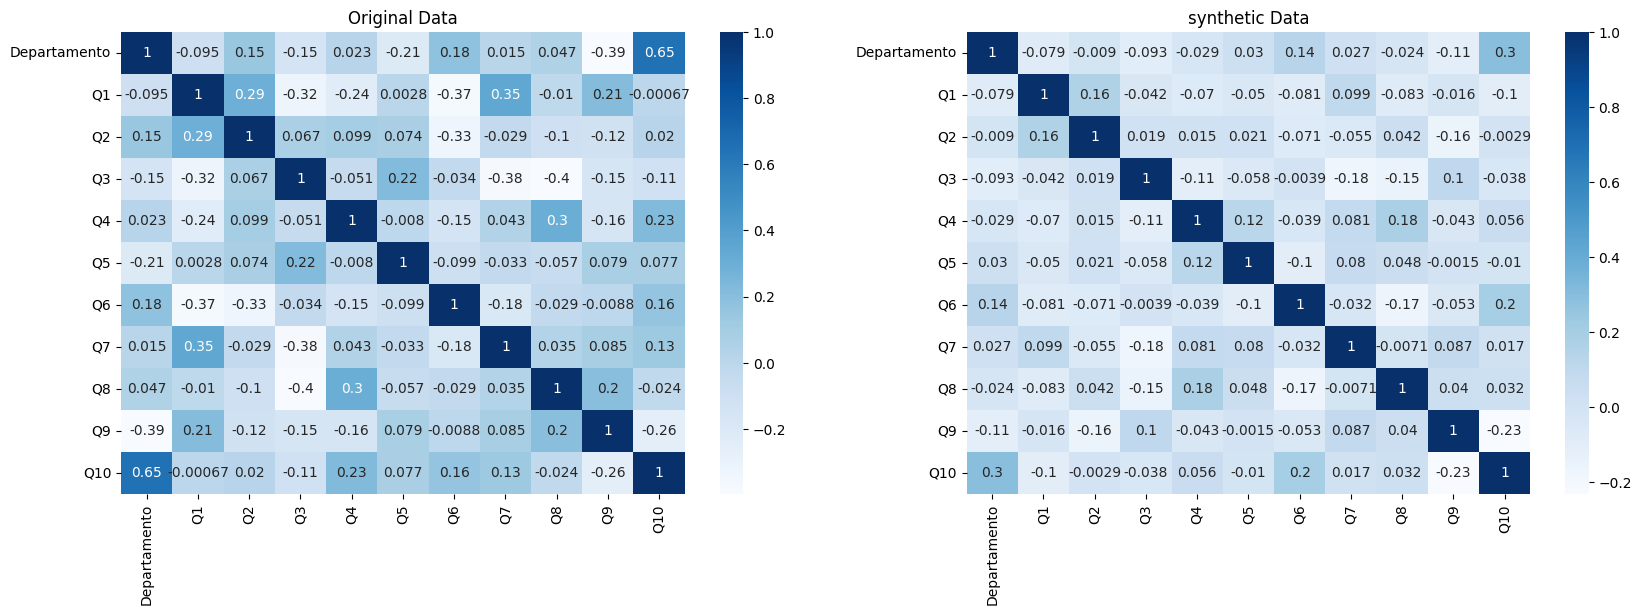

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.heatmap(df.corr(), annot=True, ax=ax[0], cmap="Blues")
sns.heatmap(new_data.corr(), annot=True, ax=ax[1], cmap="Blues")
ax[0].set_title("Original Data")
ax[1].set_title("synthetic Data")

In [30]:
new_data.to_csv('C:/Users/pedro.ribeiro/Desktop/Pedro/MOVE/tcc/tri_project/Data/new_irt_gan.csv', index=False)